In [1]:
import re
import nltk
import contractions 
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag


In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
df = pd.read_csv(r'C:\Users\shubh\OneDrive\Desktop\shubham\acadmics\6th SEM\mini project\project study\IMDB Dataset.csv')  

In [4]:
print(df['sentiment'].unique())

['positive' 'negative']


# positive sentiment -1 , negative sentiment-> 0

In [5]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [6]:
print(df['sentiment'].unique())

[1 0]


In [7]:
print(df.describe())

          sentiment
count  50000.000000
mean       0.500000
std        0.500005
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
None


In [9]:
print(df['sentiment'].value_counts())

sentiment
1    25000
0    25000
Name: count, dtype: int64


In [10]:
print(df.count())

review       50000
sentiment    50000
dtype: int64


In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
print(df.head())

                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


# apply text processing

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {"J": "a", "N": "n", "V": "v", "R": "r"}  # Mapping for WordNet
    return tag_dict.get(tag, "n")  # Default to noun

def preprocess_text(text):
    text = contractions.fix(text)  

    text = re.sub(r'<.*?>', '', text) 

    text = text.lower()  

    text = re.sub(r"[^a-zA-Z\s]", '', text) 
    
    words = word_tokenize(text)  
    
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stop_words]
    
    return ' '.join(words)


df['processed_review'] = df['review'].apply(preprocess_text)


In [15]:
df.shape

(50000, 3)

In [16]:
df.columns

Index(['review', 'sentiment', 'processed_review'], dtype='object')

In [17]:
# drop the review column
column_to_remove = 'review'
df = df.drop(columns=[column_to_remove])

In [18]:
df.columns

Index(['sentiment', 'processed_review'], dtype='object')

In [19]:
df.head()

,sentiment,processed_review
0,1,one reviewer mention watch oz episode hooked r...
1,1,wonderful little production film technique una...
2,1,thought wonderful way spend time hot summer we...
3,0,basically family little boy jake think zombie ...
4,1,petter matteis love time money visually stun f...


In [20]:
cols = [col for col in df.columns if col != 'sentiment']  # Get all columns except 'sentiment'
df = df[cols + ['sentiment']]  # Reorder columns

print(df.head())

                                    processed_review  sentiment
0  one reviewer mention watch oz episode hooked r...          1
1  wonderful little production film technique una...          1
2  thought wonderful way spend time hot summer we...          1
3  basically family little boy jake think zombie ...          0
4  petter matteis love time money visually stun f...          1


In [21]:
df.to_csv('modified_dataset_for_ML.csv', index=False)

In [22]:
import matplotlib.pyplot as plt

In [23]:
df.describe(include="all")

,processed_review,sentiment
count,50000,50000.000000
unique,49577,NaN
top,love today show variety solely cooking would g...,NaN
freq,5,NaN
mean,NaN,0.500000
std,NaN,0.500005
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.500000
75%,NaN,1.000000


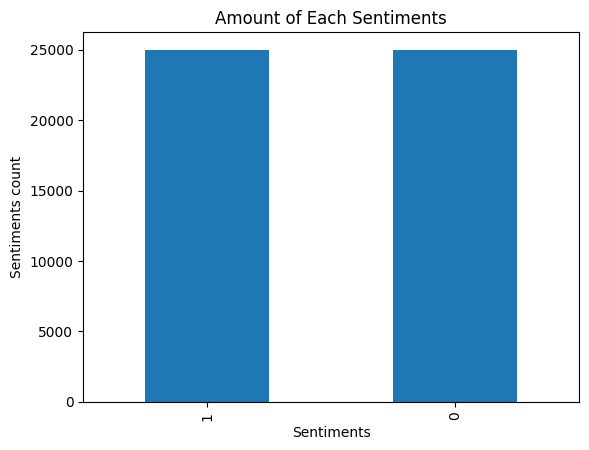

In [24]:
df["sentiment"].value_counts().plot(kind = "bar")
plt.title("Amount of Each Sentiments")
plt.xlabel("Sentiments")
plt.ylabel("Sentiments count")
plt.show()

In [25]:
df2 = pd.read_csv('modified_dataset_for_ML.csv')  

In [26]:
df2.columns

Index(['processed_review', 'sentiment'], dtype='object')

In [27]:
df2["length"] = df2["processed_review"].astype(str).apply(len)

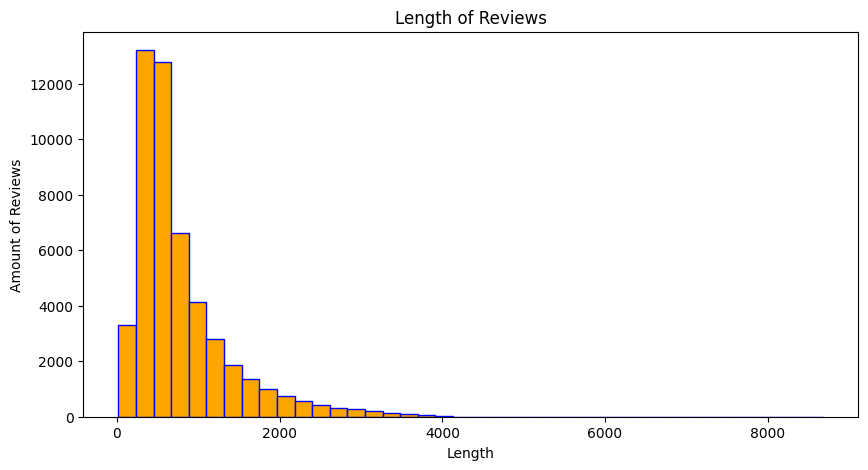

In [28]:
df2["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews")
plt.xlabel("Length")
plt.ylabel("Amount of Reviews")

plt.show()

In [29]:
df2["word_counts"] = df2["processed_review"].apply(lambda x: len(str(x).split()))

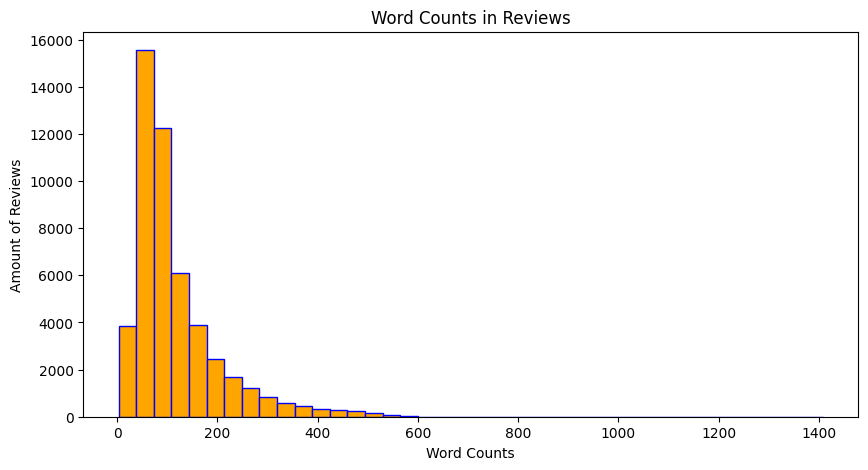

In [30]:
df2["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews")
plt.xlabel("Word Counts")
plt.ylabel("Amount of Reviews")

plt.show()